In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

In [ ]:
##reading the datasets

In [4]:
data1 = pd.read_excel("Inventory Dataset.xlsx")

In [5]:
data2 = pd.read_excel("New Inventory.xlsx")

In [6]:
data1

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399
...,...,...,...
351,064-18-9909,2023-06-17,12
352,064-18-9962,2023-06-17,19
353,064-18-0790,2023-06-17,5
354,064-18-3316,2023-06-17,7354


In [7]:
data2

,Item Number,Inventory Receive,Total Item Qty
0,064-13-0002,2023-07-07,700
1,064-13-0338,2023-07-07,1700
2,064-13-0340,2023-07-07,1000
3,064-13-0353,2023-07-07,1900
4,064-13-0416,2023-07-07,1000
...,...,...,...
1034,064-09-3787,2023-07-07,2088
1035,064-09-5287,2023-07-07,1388
1036,064-09-7924,2023-07-07,1632
1037,064-09-9076,2023-07-07,1708


In [13]:
##checking for null values

In [17]:
data1.isna().sum()

Item Number    0
Date           0
Inventory      0
dtype: int64

In [18]:
data2.isna().sum()

Item Number          0
Inventory Receive    0
Total Item Qty       0
dtype: int64

In [24]:
##renaming column names of data2 to merger with data1

In [28]:
data2.rename(columns={"Inventory Receive":"Date","Total Item Qty":"Inventory"},inplace=True)

In [29]:
data2

,Item Number,Date,Inventory
0,064-13-0002,2023-07-07,700
1,064-13-0338,2023-07-07,1700
2,064-13-0340,2023-07-07,1000
3,064-13-0353,2023-07-07,1900
4,064-13-0416,2023-07-07,1000
...,...,...,...
1034,064-09-3787,2023-07-07,2088
1035,064-09-5287,2023-07-07,1388
1036,064-09-7924,2023-07-07,1632
1037,064-09-9076,2023-07-07,1708


In [ ]:
##concatinating two tables

In [36]:
Merged_Data=pd.concat([data1,data2])

In [37]:
Merged_Data

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399
...,...,...,...
1034,064-09-3787,2023-07-07,2088
1035,064-09-5287,2023-07-07,1388
1036,064-09-7924,2023-07-07,1632
1037,064-09-9076,2023-07-07,1708


In [ ]:
##plotting a pivot table

In [41]:
Merged_Data[Merged_Data["Item Number"]=="064-18-9938"]

,Item Number,Date,Inventory
289,064-18-9938,2023-06-17,2736
43,064-18-9938,2023-08-16,2084
72,064-18-9938,2023-10-13,1976
280,064-18-9938,2023-09-29,1976
515,064-18-9938,2023-07-09,2764
539,064-18-9938,2023-08-04,1368
634,064-18-9938,2023-09-08,2084
938,064-18-9938,2023-07-28,3196


In [66]:
pivot=pd.pivot_table(Merged_Data, values='Inventory', index=['Item Number'], columns=['Date'], fill_value=0)

In [67]:
Inventory_table=pivot.resample('M', axis=1).sum()

In [68]:
Inventory_table

Date,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
Item Number,,,,,,,
064-01-0003,0,0,0,5488,1864,0,0
064-01-0005,0,0,0,7380,2520,0,0
064-01-0006,10,0,0,0,0,0,0
064-01-0012,0,0,0,6840,3244,0,0
064-01-0013,0,0,0,6300,1748,0,0
...,...,...,...,...,...,...,...
064-18-9884,12419,0,0,0,0,0,0
064-18-9904,0,0,0,0,0,0,23800
064-18-9909,12,0,0,0,0,0,0


In [69]:
##Taking horizontal cumulative sum

In [70]:
Inventory_table.cumsum(axis=1)

Date,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
Item Number,,,,,,,
064-01-0003,0,0,0,5488,7352,7352,7352
064-01-0005,0,0,0,7380,9900,9900,9900
064-01-0006,10,10,10,10,10,10,10
064-01-0012,0,0,0,6840,10084,10084,10084
064-01-0013,0,0,0,6300,8048,8048,8048
...,...,...,...,...,...,...,...
064-18-9884,12419,12419,12419,12419,12419,12419,12419
064-18-9904,0,0,0,0,0,0,23800
064-18-9909,12,12,12,12,12,12,12


In [71]:
Inventory_table.columns = Inventory_table.columns.strftime('%B')

<AxesSubplot: xlabel='Month', ylabel='Total Inventory'>

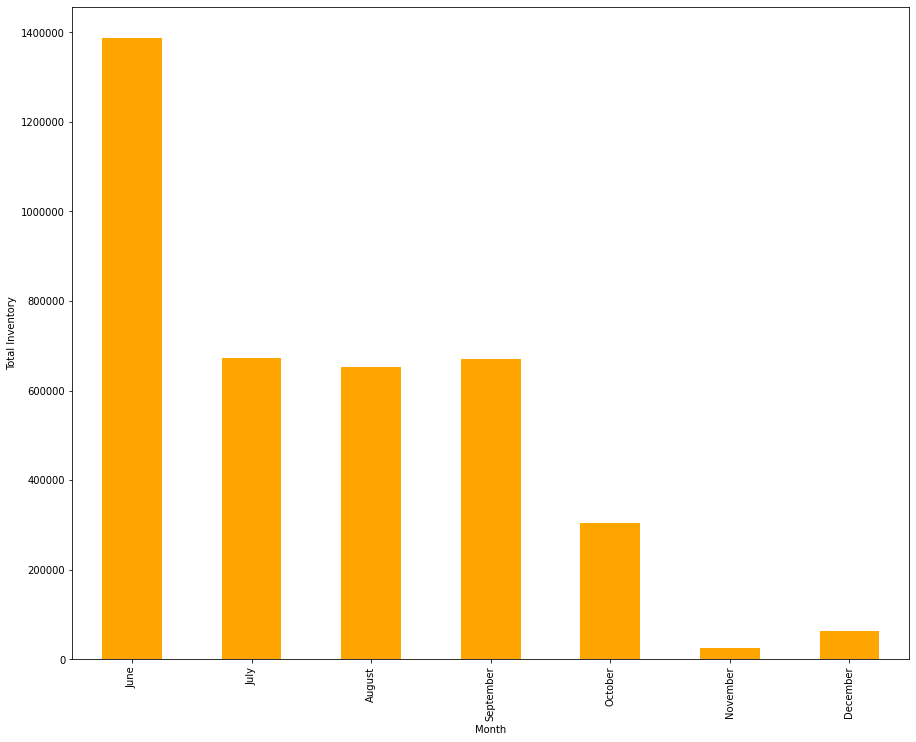

In [96]:
plt.figure(figsize=(15,12))

Graph=Inventory_table.sum().plot(kind='bar',color="orange")
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False) 
plt.xlabel("Month")
plt.ylabel("Total Inventory")
plt.gca().yaxis.set_major_formatter(formatter)
Graph